In [54]:
import warnings
warnings.filterwarnings(action='ignore')

In [55]:
import sklearn

import tensorflow as tf
from tensorflow import keras

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 핸즈온 머신러닝 2판 - Chapter 11 심층 신경망 훈련하기

## 11.1 그레이디언트 소실과 폭주 문제

### 11.1.1 글러럿과 He초기화

In [56]:
#케라스는 기본적으로 균등분포의 글로럿 초기화 사용
#kernel_initializer = "he_uniform" / kernel_initializer = "he_normal"로 바꾸어 He 초기호 사용
keras.layers.Dense(10, activation="relu", kernel_initializer = "he_normal")

In [57]:
#fan_in 대신 fan_out 기반의 균등분포 He 초기화
he_avg_init = keras.initializers.VarianceScaling(scale = 2., mode = 'fan_avg', distribution = 'uniform')
keras.layers.Dense(10, activation = "sigmoid", kernel_initializer = he_avg_init)

### 11.1.2 수렴하지 않는 활성화 함수

LeakyReLU 사용하기

In [58]:
def leaky_relu(z, alpha = 0.01):
    return np.maximum(alpha * z, z)

In [59]:
#LeakyReLU를 사용해 패션MNIST에서 신경망 훈련
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [60]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [61]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7658
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6816 - accuracy: 0.7722 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6218 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8062
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8198
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5339 - accuracy: 0.8224 - val_loss: 0.5157 - val_accuracy:

PReLU 사용하기

In [62]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [63]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3337 - accuracy: 0.6140 - val_loss: 0.8952 - val_accuracy: 0.7192
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8048 - accuracy: 0.7413 - val_loss: 0.7103 - val_accuracy: 0.7742
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6849 - accuracy: 0.7771 - val_loss: 0.6404 - val_accuracy: 0.7962
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6237 - accuracy: 0.7941 - val_loss: 0.5859 - val_accuracy: 0.8128
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5846 - accuracy: 0.8073 - val_loss: 0.5542 - val_accuracy: 0.8192
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5567 - accuracy: 0.8146 - val_loss: 0.5314 - val_accuracy: 0.8242
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5352 - accuracy: 0.8204 - val_loss: 0.5121 - val_accuracy:

SELU 사용하기

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [65]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [66]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [67]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 38s 21ms/step - loss: 1.3038 - accuracy: 0.5038 - val_loss: 0.8459 - val_accuracy: 0.6884
Epoch 2/5
1719/1719 [==============================] - 35s 20ms/step - loss: 0.7134 - accuracy: 0.7469 - val_loss: 0.6534 - val_accuracy: 0.7778
Epoch 3/5
1719/1719 [==============================] - 36s 21ms/step - loss: 0.5807 - accuracy: 0.8007 - val_loss: 0.6647 - val_accuracy: 0.7876
Epoch 4/5
1719/1719 [==============================] - 37s 22ms/step - loss: 0.5318 - accuracy: 0.8179 - val_loss: 0.5148 - val_accuracy: 0.8284
Epoch 5/5
1719/1719 [==============================] - 40s 23ms/step - loss: 0.4874 - accuracy: 0.8320 - val_loss: 0.5261 - val_accuracy: 0.8286


### 11.1.3 배치 정규화

케라스로 배치 정규화 구현하기

In [68]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [69]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_247 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_248 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_249 (Dense)            (None, 10)              

In [70]:
#첫 번째 배치 정규화 층의 파라미터 / 두개는 역전파 훈련, 나머지 두개는 훈련 X
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

In [71]:
#이동 평균을 업데이트
bn1.updates

[]

In [72]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8712 - accuracy: 0.7122 - val_loss: 0.5656 - val_accuracy: 0.8084
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5845 - accuracy: 0.7993 - val_loss: 0.4784 - val_accuracy: 0.8406
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5254 - accuracy: 0.8181 - val_loss: 0.4414 - val_accuracy: 0.8522
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4874 - accuracy: 0.8289 - val_loss: 0.4183 - val_accuracy: 0.8602
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4608 - accuracy: 0.8383 - val_loss: 0.4015 - val_accuracy: 0.8656
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4433 - accuracy: 0.8450 - val_loss: 0.3895 - val_accuracy: 0.8680
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4292 - accuracy: 0.8495 - val_loss: 0.3795 - val_accuracy:

In [73]:
# 활성화 함수전에 BN을 적용해도 잘 동작합니다.
#또한 BatchNormalization 층 이전의 층은 편향을 위한 항이 필요 없습니다.
#BatchNormalization 층이 이를 무효화하기 때문입니다. 
#따라서 필요 없는 파라미터이므로 use_bias=False를 지정하여 층을 만들 수 있습니다:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0346 - accuracy: 0.6823 - val_loss: 0.6709 - val_accuracy: 0.7916
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6714 - accuracy: 0.7842 - val_loss: 0.5485 - val_accuracy: 0.8186
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5900 - accuracy: 0.8047 - val_loss: 0.4936 - val_accuracy: 0.8330
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5395 - accuracy: 0.8184 - val_loss: 0.4611 - val_accuracy: 0.8438
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5065 - accuracy: 0.8275 - val_loss: 0.4381 - val_accuracy: 0.8500
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4853 - accuracy: 0.8332 - val_loss: 0.4212 - val_accuracy: 0.8556
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4696 - accuracy: 0.8387 - val_loss: 0.4085 - val_accuracy:

### 11.1.4 그레이디언트 클리핑

In [75]:
#케라스에서 옵티마이저를 만들 때 clipvalue와 clipnorm 매개변수를 지정
optimizer = keras.optimizers.SGD(clipvalue = 1.0)
model.compile(loss = "mse", optimizer = optimizer)

## 11.2 사전훈련된 층 재사용하기

### 11.2.1 케라스를 사용한 전이 학습

* 패션 MNIST 훈련 세트를 두 개로 나누기
 - X_train_A: 샌달과 셔츠(클래스 5와 6)을 제외한 모든 이미지
 - X_train_B: 샌달과 셔츠 이미지 중 처음 200개만 가진 작은 훈련 세트

* A세트(8개의 클래스를 가진 분류 문제)에서 모델을 훈련하고 이를 재사용하여 B세트(이진 분류)를 해결

In [76]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [77]:
print(X_train_A.shape)
print(X_train_B.shape)

(43986, 28, 28)
(200, 28, 28)


In [78]:
#model_A 학습
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [79]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5860 - accuracy: 0.8035 - val_loss: 0.3864 - val_accuracy: 0.8652
Epoch 2/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.3581 - accuracy: 0.8760 - val_loss: 0.3240 - val_accuracy: 0.8874
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3188 - accuracy: 0.8879 - val_loss: 0.2969 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2986 - accuracy: 0.8966 - val_loss: 0.2855 - val_accuracy: 0.9031
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2854 - accuracy: 0.9018 - val_loss: 0.2775 - val_accuracy: 0.9098
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2755 - accuracy: 0.9054 - val_loss: 0.2700 - val_accuracy: 0.9081
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9089 - val_loss: 0.2689 - val_accuracy:

In [80]:
# A모델 저장
model_A.save("my_model_A.h5")

In [81]:
#model_B 학습
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [82]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 30ms/step - loss: 0.8231 - accuracy: 0.5600 - val_loss: 0.5735 - val_accuracy: 0.6724
Epoch 2/20
7/7 [==============================] - 0s 21ms/step - loss: 0.4995 - accuracy: 0.7550 - val_loss: 0.3927 - val_accuracy: 0.8600
Epoch 3/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3372 - accuracy: 0.9050 - val_loss: 0.3001 - val_accuracy: 0.9158
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.2509 - accuracy: 0.9800 - val_loss: 0.2469 - val_accuracy: 0.9361
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2022 - accuracy: 0.9850 - val_loss: 0.2114 - val_accuracy: 0.9483
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 0.1677 - accuracy: 0.9850 - val_loss: 0.1866 - val_accuracy: 0.9594
Epoch 7/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1445 - accuracy: 0.9900 - val_loss: 0.1708 - val_accuracy: 0.9686
Epoch 8/20
7/7 [===========

In [83]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dense_250 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_251 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)             

In [84]:
#model_A를 로드하고, 이 모델의 층을 기반으로 model_B_on_A를 생성(출력층 제외 모든 층 재사용)
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation = "sigmoid"))

In [85]:
#층울 공유하는 과정에서 원본에 영향을 주지 않기 위해 clone 파일 만들기
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [86]:
#처음 몇 번의 에포크 동안 재사용된 층을 동결하고 새로운 층에 적절한 가중치를 학습할 시간 제공
#모든 층의 trainable 속성을 False로 지정하고 모델을 컴파일
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [87]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 26ms/step - loss: 1.0449 - accuracy: 0.3600 - val_loss: 0.9471 - val_accuracy: 0.4209
Epoch 2/4
7/7 [==============================] - 0s 11ms/step - loss: 0.9435 - accuracy: 0.4500 - val_loss: 0.8620 - val_accuracy: 0.4787
Epoch 3/4
7/7 [==============================] - 0s 12ms/step - loss: 0.8572 - accuracy: 0.4850 - val_loss: 0.7883 - val_accuracy: 0.5254
Epoch 4/4
7/7 [==============================] - 0s 13ms/step - loss: 0.7824 - accuracy: 0.5450 - val_loss: 0.7199 - val_accuracy: 0.5730
Epoch 1/16
7/7 [==============================] - 0s 28ms/step - loss: 0.5983 - accuracy: 0.6950 - val_loss: 0.4337 - val_accuracy: 0.8803
Epoch 2/16
7/7 [==============================] - 0s 13ms/step - loss: 0.3900 - accuracy: 0.8850 - val_loss: 0.3410 - val_accuracy: 0.9280
Epoch 3/16
7/7 [==============================] - 0s 15ms/step - loss: 0.3094 - accuracy: 0.9200 - val_loss: 0.2858 - val_accuracy: 0.9452
Epoch 4/16
7/7 [===============

In [88]:
#최종 점수
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9800


[0.08988627046346664, 0.9800000190734863]

In [89]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9895


[0.09780494123697281, 0.9894999861717224]

## 11.3 고속 옵티마이저

### 11.3.1 모멘텀 최적화

In [90]:
# 케라스에서 모멘텀 최적화 구현
optimizer = keras.optimizers.SGD(lr = 0.001, momentum = 0.9)

### 11.3.2 네스테로프 가속 경사

In [91]:
#네스테로프 가속 경사
optimizer = keras.optimizers.SGD(lr = 0.001, momentum=0.9, nesterov = True)

### 11.3.3 AdaGrad

In [92]:
#AdaGrad
optimizer = keras.optimizers.Adagrad(lr=0.001)

### 11.3.4 RMSProp

In [93]:
#RMSProp 옵티마이저
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### ﻿11.3.5 Adam과 Nadam 최적화

In [94]:
#Adam 옵티마이저
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [95]:
#AdaMax 옵티마이저
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
#Nadam 옵티마이저
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## 11.3.6 학습률 스케줄링

* 거듭제곱 기반 스케줄링(Power Scheduling)

In [96]:
#거듭제곱 기반 스케줄링
#lr = lr0 / (1 + steps / s)**c
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [97]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4930 - accuracy: 0.8270 - val_loss: 0.4028 - val_accuracy: 0.8614
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3821 - accuracy: 0.8652 - val_loss: 0.3734 - val_accuracy: 0.8708
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8761 - val_loss: 0.3758 - val_accuracy: 0.8674
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3277 - accuracy: 0.8826 - val_loss: 0.3514 - val_accuracy: 0.8750
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8894 - val_loss: 0.3456 - val_accuracy: 0.8760
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2986 - accuracy: 0.8932 - val_loss: 0.3429 - val_accuracy: 0.8834
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2885 - accuracy: 0.8977 - val_loss: 0.3376 - val_accuracy:

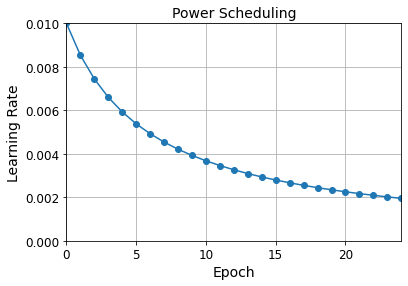

In [98]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

* 지수 기반 스케줄링

In [99]:
#지수 기반 스케줄링
#lr = lr0 * 0.1**(epoch / s)
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [100]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8177 - accuracy: 0.7646 - val_loss: 0.9901 - val_accuracy: 0.7160
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7224 - accuracy: 0.7865 - val_loss: 0.5842 - val_accuracy: 0.8254
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5680 - accuracy: 0.8242 - val_loss: 0.7370 - val_accuracy: 0.7846
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5101 - accuracy: 0.8388 - val_loss: 0.4965 - val_accuracy: 0.8564
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5081 - accuracy: 0.8405 - val_loss: 0.4772 - val_accuracy: 0.8572
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4479 - accuracy: 0.8590 - val_loss: 0.5182 - val_accuracy: 0.8578
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4107 - accuracy: 0.8703 - val_loss: 0.5158 - val_accuracy:

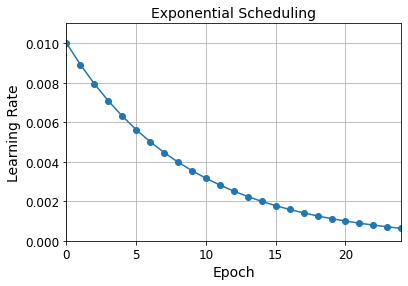

In [101]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [102]:
#이 스케줄 함수는 두 번째 매개변수로 현재 학습률을 받을 수 있다.
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [103]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8036 - accuracy: 0.7651 - val_loss: 0.8314 - val_accuracy: 0.7406
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6298 - accuracy: 0.8056 - val_loss: 0.5361 - val_accuracy: 0.8296
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5593 - accuracy: 0.8233 - val_loss: 0.6259 - val_accuracy: 0.8272
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5073 - accuracy: 0.8411 - val_loss: 0.4577 - val_accuracy: 0.8586
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4599 - accuracy: 0.8535 - val_loss: 0.4852 - val_accuracy: 0.8680
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4216 - accuracy: 0.8656 - val_loss: 0.4712 - val_accuracy: 0.8564
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3966 - accuracy: 0.8736 - val_loss: 0.4383 - val_accuracy:

In [104]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

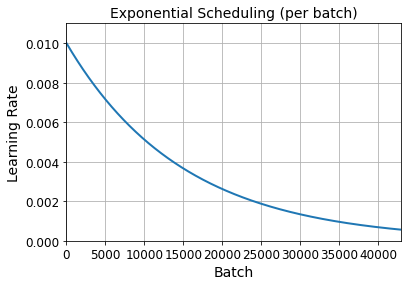

In [105]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

* 구간별 고정 스케줄링

In [106]:
#구간별 고정 스케줄링
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [107]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [108]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8727 - accuracy: 0.7517 - val_loss: 0.9351 - val_accuracy: 0.7856
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9277 - accuracy: 0.7395 - val_loss: 0.9409 - val_accuracy: 0.7368
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8458 - accuracy: 0.7509 - val_loss: 1.6225 - val_accuracy: 0.6554
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8909 - accuracy: 0.7436 - val_loss: 1.1636 - val_accuracy: 0.6076
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0672 - accuracy: 0.6445 - val_loss: 1.2551 - val_accuracy: 0.6534
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7560 - accuracy: 0.7340 - val_loss: 0.7169 - val_accuracy: 0.7566
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6835 - accuracy: 0.7503 - val_loss: 0.7134 - val_accuracy:

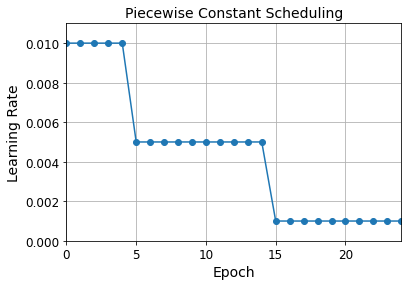

In [109]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

* 성능 기반 스케줄링

In [110]:
# 성능기반 스케줄링은 ReduceLROnPlateau을 사용한다
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5975 - accuracy: 0.8047 - val_loss: 0.4833 - val_accuracy: 0.8502
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4858 - accuracy: 0.8420 - val_loss: 0.5530 - val_accuracy: 0.8406
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5068 - accuracy: 0.8427 - val_loss: 0.5126 - val_accuracy: 0.8592
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5205 - accuracy: 0.8451 - val_loss: 0.5067 - val_accuracy: 0.8570
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5099 - accuracy: 0.8519 - val_loss: 0.4764 - val_accuracy: 0.8534
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4999 - accuracy: 0.8557 - val_loss: 0.4779 - val_accuracy: 0.8608
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5353 - accuracy: 0.8517 - val_loss: 0.5305 - val_accuracy:

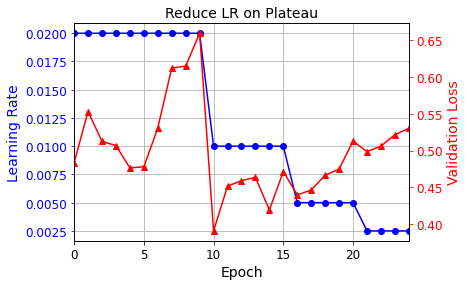

In [111]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

* 사이클 스케줄링

In [112]:
#1사이클 스케줄링
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [113]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3848


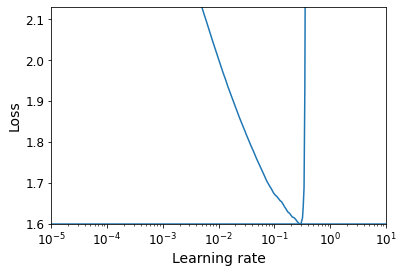

In [114]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [115]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [116]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 2ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8338
Epoch 2/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4581 - accuracy: 0.8398 - val_loss: 0.4275 - val_accuracy: 0.8522
Epoch 3/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8546 - val_loss: 0.4114 - val_accuracy: 0.8582
Epoch 4/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8643 - val_loss: 0.3868 - val_accuracy: 0.8682
Epoch 5/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8718 - val_loss: 0.3768 - val_accuracy: 0.8682
Epoch 6/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8772 - val_loss: 0.3740 - val_accuracy: 0.8710
Epoch 7/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8811 - val_loss: 0.3634 - val_accuracy: 0.8704
Epoch 

In [117]:
#tf.keras 스케줄러
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4895 - accuracy: 0.8274 - val_loss: 0.4093 - val_accuracy: 0.8610
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3821 - accuracy: 0.8647 - val_loss: 0.3743 - val_accuracy: 0.8692
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3487 - accuracy: 0.8767 - val_loss: 0.3734 - val_accuracy: 0.8682
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3264 - accuracy: 0.8837 - val_loss: 0.3498 - val_accuracy: 0.8804
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3105 - accuracy: 0.8897 - val_loss: 0.3434 - val_accuracy: 0.8800
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8954 - val_loss: 0.3416 - val_accuracy: 0.8806
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2855 - accuracy: 0.8989 - val_loss: 0.3355 - val_accuracy:

In [118]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

## 11.4 규제를 사용해 과대적합 피하기

### 11.4.1 $ℓ_{1} 과 ℓ_{2}$ 규제

In [119]:
#케라스 층의 연결 가중치에 규제 강도 0.01을 사용하여 ℓ_2 규제 적용
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [120]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.5816 - accuracy: 0.8115 - val_loss: 0.7197 - val_accuracy: 0.8302
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7210 - accuracy: 0.8276 - val_loss: 0.6862 - val_accuracy: 0.8362


In [121]:
#반복문을 피하기 위해 코드를 리팩터링
#파이썬의 functions.partial() 함수를 사용하여 기본 매개변수 값을 함수 호출을 감싸기
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6630 - accuracy: 0.8122 - val_loss: 0.7202 - val_accuracy: 0.8308
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7188 - accuracy: 0.8266 - val_loss: 0.6806 - val_accuracy: 0.8402


### 11.4.2 드롭아웃

In [122]:
#드롭아웃 비율을 0.2를 사용한 드롭아웃 규제를 모든 Dense층 이전에 적용하는 코드
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5708 - accuracy: 0.8027 - val_loss: 0.3601 - val_accuracy: 0.8734
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4186 - accuracy: 0.8469 - val_loss: 0.3499 - val_accuracy: 0.8678


### 11.4.3 몬테 카를로 드롭아웃

In [123]:
#MC드롭아웃
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [124]:
#드롭아웃을 끈 패션MNIST
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.11, 0.  , 0.87]],
      dtype=float32)

In [125]:
#드롭아웃을 활성화
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.35, 0.  , 0.57]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.03, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.03, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.12, 0.  , 0.82]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.17, 0.  , 0.69]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.25, 0.  , 0.68]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.07, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.1 , 0.  , 0.64]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.12, 0.  , 0

In [126]:
#드롭아웃 예측 확률
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.19, 0.  , 0.75]],
      dtype=float32)

In [127]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.19, 0.  , 0.21]],
      dtype=float32)

In [128]:
y_pred = np.argmax(y_proba, axis=1)

In [129]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8579

In [130]:
#모델이 훈련하는 동안 다르게 작동하는 층을 가지고 있을 때 MC 드롭아웃 코드
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [131]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [132]:
mc_model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_294 (Dense)            (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_295 (Dense)            (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_296 (Dense)            (None, 10)              

In [133]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [134]:
mc_model.set_weights(model.get_weights())

In [135]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.11, 0.  , 0.87]],
      dtype=float32)

### 11.4.4 맥스-노름 규제

In [136]:

layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [137]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4812 - accuracy: 0.8318 - val_loss: 0.3842 - val_accuracy: 0.8636
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3566 - accuracy: 0.8709 - val_loss: 0.3775 - val_accuracy: 0.8676
